In [9]:
# Notebook settings 
import warnings
warnings.filterwarnings("ignore")
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (9,9)

### Importing libraries

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## 1. Data preprocessing 

### Importing dataset

In [8]:
data = pd.read_csv('dataset/Churn_Modelling.csv')
X = data.iloc[:, 3:13] # Drop the three first features
y = data.iloc[:, 13]

### OneHotEncoding categorical features

In [9]:
# Get the name of categorical and low cardinality features(number of unique values in a column)  
# Why High cardinality? ==> may impact the model's performance 
cat_cols = [col_name for col_name in X.columns if X[col_name].nunique() < 10 and X[col_name].dtype == "object"]
# OnHotEncode each categorical column and concat to the dataset
for col_name in cat_cols:
    dummy_col = pd.get_dummies(X[col_name])
    X = pd.concat([X, dummy_col], axis=1)
    # drop categorical column
    X = X.drop([col_name], axis=1)

### Spliting training(ratio=0.8) and testing set 


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling 


In [11]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

## 2. Neural Network Training 

### Importing NN libraries

In [12]:
import sklearn
from keras.models import Sequential
from keras.layers import Dense # for creating Hidden Layers 
from keras.layers import LeakyReLU, PReLU, ELU # for different activation functions
from keras.layers import Dropout # for Regularization when network becomes deeper(drop some layers) 

### Setup network upon the desired I/O

In [13]:
# Net init
classifier = Sequential()
# L1 
# Params: Input=13;Output=6;Weight_initialization=he_unifrom;Activation=Relu 
classifier.add(Dense(units=10, kernel_initializer='he_normal', activation='relu', input_dim=13))
classifier.add(Dropout(0.3))
# L2 
classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))
# L3
classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))
# L4
# Params: Output=6;Weight_initialization=glorot_unifrom(Xavier&Gorat);Activation=Sigmooid()
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
#classifier.summary()
# Setup optimizer: loss function(binary_crossentropy=for binary output); loss metrics
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Fitting the model to training set 

In [14]:
# Fit the model  
model = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, nb_epoch=100)

/home/zero/anaconda/envs/amb-367/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 441us/step - loss: 0.5760 - acc: 0.7393 - val_loss: 0.4913 - val_acc: 0.7970
Epoch 2/100
5359/5359 [==============================] - 1s 249us/step - loss: 0.4846 - acc: 0.7964 - val_loss: 0.4617 - val_acc: 0.8008
Epoch 3/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.4646 - acc: 0.8035 - val_loss: 0.4431 - val_acc: 0.8095
Epoch 4/100
5359/5359 [==============================] - 1s 239us/step - loss: 0.4475 - acc: 0.8080 - val_loss: 0.4260 - val_acc: 0.8167
Epoch 5/100
5359/5359 [==============================] - 1s 236us/step - loss: 0.4306 - acc: 0.8138 - val_loss: 0.4139 - val_acc: 0.8217
Epoch 6/100
5359/5359 [==============================] - 1s 227us/step - loss: 0.4264 - acc: 0.8179 - val_loss: 0.4080 - val_acc: 0.8232
Epoch 7/100
5359/5359 [==============================] - 1s 243us/step - loss: 0.4146 - acc: 0.8274 - val_loss: 0.4017 - val_acc: 

### Ploting model's accuracy for training and validation(ratio=0.33) 



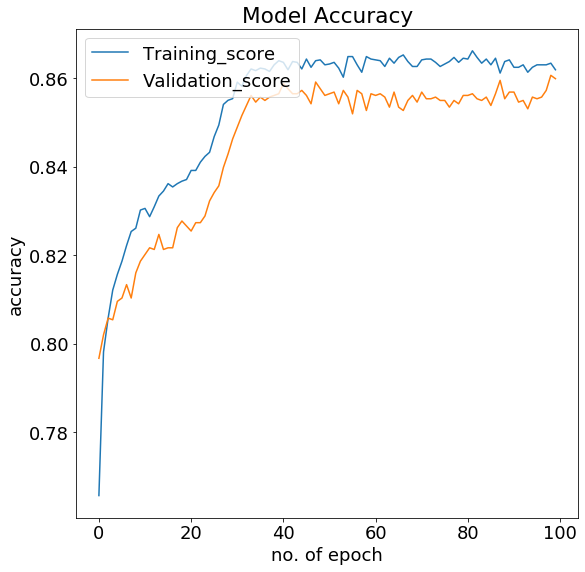

In [18]:
# Print history of the model 
#print(model.history.keys())
# Plot history of the model 
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('no. of epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Get truely classified set

In [19]:
y_predict = classifier.predict(X_test)
y_predict = (y_predict > 0.5)

### Confusion Matrix 

In [1]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

NameError: name 'y_test' is not defined